In [ ]:
import numpy as np
import matplotlib.pyplot as plt

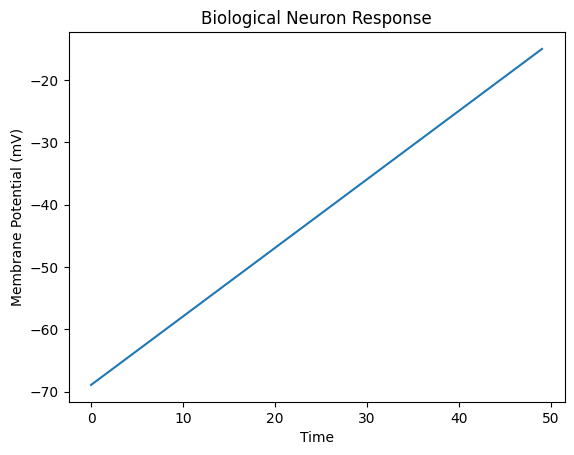

In [ ]:
class BiologicalNeuron:
    """Simulates basic biological neuron characteristics"""
    def __init__(self):
        self.resting_potential = -70  # mV
        self.threshold = 20  # mV

    def simulate_response(self, input_current):
        """Simulates neuron response to input current"""
        # Initialize membrane potential to resting potential
        membrane_potential = self.resting_potential
        # Simulate the response over time
        time_steps = 50  # Adjust as needed
        # Store membrane potential values
        membrane_potentials = []
        for t in range(time_steps):
            # Update membrane potential based on input current (simplified model)
            membrane_potential += input_current
            # Check if threshold is reached
            if membrane_potential >= self.threshold:
                # Generate an action potential (simplified representation)
                membrane_potential = 40  # Peak potential
            # Simulate decay of membrane potential (simplified model)
            membrane_potential -= -0.1 # Adjust decay rate as needed
            membrane_potentials.append(membrane_potential)

        # Plot the membrane potential over time
        plt.plot(membrane_potentials)
        plt.xlabel("Time")
        plt.ylabel("Membrane Potential (mV)")
        plt.title("Biological Neuron Response")
        plt.show()

# Example usage
neuron = BiologicalNeuron()
neuron.simulate_response(1)  # Example input current


Given artificial neuron input, also the Sigmoid Function

In [ ]:
np.random.seed(42)
class ArtificialNeuron:
    """Implements artificial neuron for comparison"""
    def __init__(self, num_inputs):
        self.weights = np.random.randn(num_inputs)
        self.bias = 0

    def activate(self, inputs):
        """Implements artificial neuron activation"""
        # Calculate weighted sum of inputs
        weighted_sum = np.dot(self.weights, inputs) + self.bias
        # Apply activation function (example: sigmoid)
        output = 1 / (1 + np.exp(-weighted_sum))
        return output

# Example usage
neuron = ArtificialNeuron(3)  # Neuron with 3 inputs
inputs = np.array([0.5, 0.2, 0.8])  # Example input values
output = neuron.activate(inputs)
print(output)


0.6767454357664645


ReLU

In [ ]:
import numpy as np
np.random.seed(42)

class ArtificialNeuron:
    """Implements artificial neuron for comparison"""
    def __init__(self, num_inputs):
        self.weights = np.random.randn(num_inputs)
        self.bias = 0

    def activate(self, inputs):
        """Implements artificial neuron activation"""
        # Calculate weighted sum of inputs
        weighted_sum = np.dot(self.weights, inputs) + self.bias
        # Apply activation function (example: sigmoid)
        output = max(0, weighted_sum)  # Correct use inside method
        return output

# Example usage
neuron = ArtificialNeuron(3)  # Neuron with 3 inputs
inputs = np.array([0.5, 0.2, 0.8])  # Example input values
output = neuron.activate(inputs)  # Call activate method to get output
print(output)


0.7388550467519334


tanh

In [ ]:
import numpy as np
np.random.seed(42)

class ArtificialNeuron:
    """Implements artificial neuron for comparison"""
    def __init__(self, num_inputs):
        self.weights = np.random.randn(num_inputs)
        self.bias = 0

    def activate(self, inputs):
        """Implements artificial neuron activation"""
        # Calculate weighted sum of inputs
        weighted_sum = np.dot(self.weights, inputs) + self.bias
        # Apply activation function (example: sigmoid)
        output = np.tanh(weighted_sum)  # Correct use inside method
        return output

# Example usage
neuron = ArtificialNeuron(3)  # Neuron with 3 inputs
inputs = np.array([0.5, 0.2, 0.8])  # Example input values
output = neuron.activate(inputs)  # Call activate method to get output
print(output)


0.6284529093659398


Simple Networks

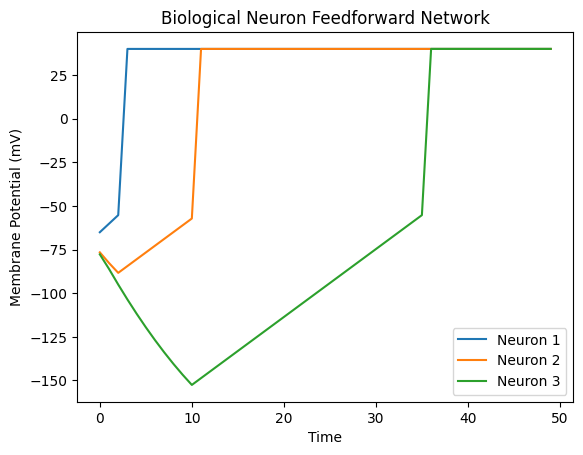

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class BiologicalNeuron:
    """Simulates a basic biological neuron"""
    def __init__(self):
        self.resting_potential = -70  # mV
        self.threshold = -55  # mV
        self.membrane_potential = self.resting_potential

    def stimulate(self, input_current):
        """Updates membrane potential based on input"""
        self.membrane_potential += input_current
        if self.membrane_potential >= self.threshold:
            self.membrane_potential = 40  # Action potential peak
        self.membrane_potential -= 0.1  # Decay effect
        return self.membrane_potential

# Create a simple network of 3 biological neurons in a chain
neurons = [BiologicalNeuron() for _ in range(3)]
input_current = 5  # Initial stimulus
time_steps = 50

membrane_potentials = [[] for _ in range(3)]

for _ in range(time_steps):
    current = input_current
    for i, neuron in enumerate(neurons):
        potential = neuron.stimulate(current)
        membrane_potentials[i].append(potential)
        current = potential * 0.1  # Small signal passed to the next neuron

# Plot the results
for i, potentials in enumerate(membrane_potentials):
    plt.plot(potentials, label=f'Neuron {i+1}')

plt.xlabel("Time")
plt.ylabel("Membrane Potential (mV)")
plt.title("Biological Neuron Feedforward Network")
plt.legend()
plt.show()


Artificial Network with graph. The darker colors represent a higher activation

/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


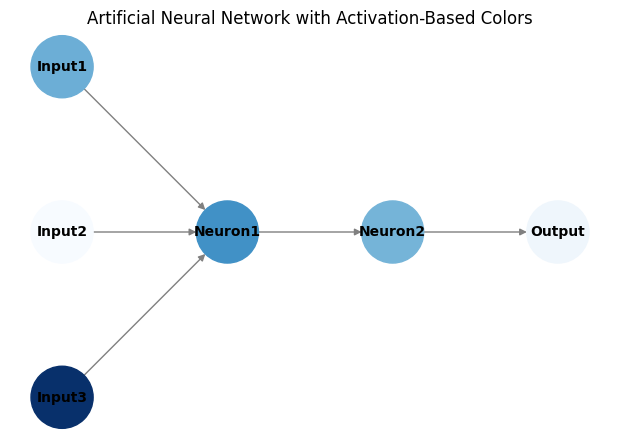

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

class ArtificialNeuron:
    """Implements an artificial neuron"""
    def __init__(self, num_inputs, activation="sigmoid"):
        self.weights = np.random.randn(num_inputs)
        self.bias = np.random.randn()
        self.activation = activation

    def activate(self, inputs):
        """Applies activation function"""
        weighted_sum = np.dot(self.weights, inputs) + self.bias
        if self.activation == "sigmoid":
            return 1 / (1 + np.exp(-weighted_sum))
        elif self.activation == "relu":
            return max(0, weighted_sum)
        elif self.activation == "tanh":
            return np.tanh(weighted_sum)
        return weighted_sum  # Linear output

# Define a simple 3-layer feedforward network
inputs = np.array([0.5, 0.2, 0.8])  # Input layer

# Create neurons
neuron1 = ArtificialNeuron(3)  # First layer neuron
neuron2 = ArtificialNeuron(1)  # Second layer neuron
neuron3 = ArtificialNeuron(1)  # Output neuron

# Compute activations
out1 = neuron1.activate(inputs)
out2 = neuron2.activate(np.array([out1]))  # Uses output of neuron1
out3 = neuron3.activate(np.array([out2]))  # Uses output of neuron2

# Store activation values for visualization
activations = {
    "Input1": inputs[0],
    "Input2": inputs[1],
    "Input3": inputs[2],
    "Neuron1": out1,
    "Neuron2": out2,
    "Output": out3
}

# Build network graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(activations.keys())

# Define node positions
pos = {
    "Input1": (0, 2),
    "Input2": (0, 1),
    "Input3": (0, 0),
    "Neuron1": (1, 1),
    "Neuron2": (2, 1),
    "Output": (3, 1)
}

# Define edges (connections)
edges = [
    ("Input1", "Neuron1"),
    ("Input2", "Neuron1"),
    ("Input3", "Neuron1"),
    ("Neuron1", "Neuron2"),
    ("Neuron2", "Output")
]
G.add_edges_from(edges)

# Normalize activation values for coloring (0 to 1 scale)
activation_values = np.array(list(activations.values()))
activation_values = (activation_values - activation_values.min()) / (activation_values.max() - activation_values.min() + 1e-5)  # Avoid divide by zero

# Assign colors based on activation values
node_colors = plt.cm.Blues(activation_values)  # Blue colormap

# Draw the network
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=2000, font_size=10, font_weight="bold", cmap=plt.cm.Blues)
plt.title("Artificial Neural Network with Activation-Based Colors")
plt.show()

